# Data Analysis Notebook

This notebook combines data collection (scraping) and data preprocessing.

Steps:
1. **Scrape** reviews from Google Play Store
2. **Preprocess** and clean the data
3. **Visualize** the results

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the current working directory
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

# Check if we need to change directory to the project root
if os.path.basename(current_dir) == 'Scripts':
    project_root = os.path.dirname(current_dir)
    os.chdir(project_root)
    print(f"Changed working directory to: {project_root}")
    sys.path.append(current_dir)
else:
    scripts_path = os.path.join(current_dir, 'Scripts')
    if os.path.exists(scripts_path):
        sys.path.append(scripts_path)

# Import modules
try:
    from preprocessing import ReviewPreprocessor
    try:
        from scraper import main as run_scraper
    except ImportError:
        from scraper import main as run_scraper
except ImportError as e:
    # Fallback logic if imports fail directly
    sys.path.append(os.getcwd())
    from preprocessing import ReviewPreprocessor
    from scraper import main as run_scraper

Current working directory: c:\Users\Administrator\Desktop\Omega_Consultancy-wee-2\scripts


## 1. Run Scraper

This cell runs the scraping script to fetch the latest reviews from the Google Play Store.
The output will show the progress.

In [2]:
print("🚀 Starting Scraper...")

# Run the main scraper function
raw_df = run_scraper()

print("\n✅ Scraping Finished.")
display(raw_df.head())

🚀 Starting Scraper...
Starting Google Play Store Review Scraper

[1/2] Fetching app information...

CBE: Commercial Bank of Ethiopia
App ID: com.combanketh.mobilebanking
Current Rating: 4.3186927
Total Ratings: 38878
Total Reviews: 8339

Abyssinia: Bank of Abyssinia
App ID: com.boa.boaMobileBanking
Current Rating: 4.1838007
Total Ratings: 6390
Total Reviews: 1226

Dashen: Dashen Bank
App ID: com.dashen.dashensuperapp
Current Rating: 4.1617646
Total Ratings: 3977
Total Reviews: 784

App information saved to data/raw/app_info.csv

[2/2] Scraping reviews...


Banks:   0%|          | 0/3 [00:00<?, ?it/s]


Scraping reviews for com.combanketh.mobilebanking...
Successfully scraped 400 reviews
Collected 400 reviews for Commercial Bank of Ethiopia


Banks:  33%|███▎      | 1/3 [00:04<00:08,  4.42s/it]


Scraping reviews for com.boa.boaMobileBanking...
Successfully scraped 400 reviews
Collected 400 reviews for Bank of Abyssinia


Banks:  67%|██████▋   | 2/3 [00:08<00:04,  4.50s/it]


Scraping reviews for com.dashen.dashensuperapp...
Successfully scraped 400 reviews
Collected 400 reviews for Dashen Bank


Banks: 100%|██████████| 3/3 [00:13<00:00,  4.37s/it]


Scraping Complete!

Total reviews collected: 1200
Reviews per bank:
  Commercial Bank of Ethiopia: 400
  Bank of Abyssinia: 400
  Dashen Bank: 400

Data saved to: data/raw/reviews_raw.csv

Sample Reviews

Commercial Bank of Ethiopia:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: good...
Date: 2025-11-30 10:24:48

Rating: ⭐⭐⭐⭐⭐
Review: CBE ይለያል።...
Date: 2025-11-29 11:22:32

Rating: ⭐⭐⭐⭐⭐
Review: it's special for me...
Date: 2025-11-29 09:54:14

Bank of Abyssinia:
------------------------------------------------------------

Rating: ⭐⭐
Review: Make the reason we wrote visible on app transaction....
Date: 2025-12-01 03:20:30

Rating: ⭐
Review: app is note active working crash...
Date: 2025-11-30 15:57:28

Rating: ⭐⭐⭐⭐⭐
Review: 🙏👍...
Date: 2025-11-28 21:47:54

Dashen Bank:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: Great...
Date: 2025-12-01 07:59:21

Rating: ⭐⭐⭐⭐⭐
Review: when u release update its always a pro

,review_id,review_text,rating,review_date,user_name,thumbs_up,reply_content,bank_code,bank_name,app_id,source
0,361ac925-5bd6-4455-8efe-95394a4ba679,good,5,2025-11-30 10:24:48,Mahamed Abdireshid,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play
1,cb37b096-e071-4f0f-a8fd-067b7d71706d,CBE ይለያል።,5,2025-11-29 11:22:32,Kamil Tesfaye,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
2,70f504ff-daed-40d9-9c89-cc49a95ef659,it's special for me,5,2025-11-29 09:54:14,Abde Semed,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
3,28f229b5-0026-41b9-a1eb-b76e74736f63,Make it user friendly.,2,2025-11-29 02:17:45,TOMIZ Creativity,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play
4,68d8daea-db47-4e23-a692-755173dea983,maaliif daddafee install gaafata,3,2025-11-28 07:36:32,Tesfaye Abdi,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play


## 2. Run Preprocessing Pipeline

Now we clean the scraped data using our `ReviewPreprocessor`.

In [3]:
# Initialize the preprocessor
preprocessor = ReviewPreprocessor()

# Run the process
success = preprocessor.process()

if success:
    print("\n✅ Preprocessing finished successfully!")
    df = preprocessor.df
else:
    print("❌ Preprocessing failed.")

STARTING DATA PREPROCESSING
Loading raw data...
Loaded 1200 reviews

[1/6] Checking for missing data...

Missing values:
  reply_content: 1198 (99.83%)
  app_id: 276 (23.00%)

[2/6] Handling missing values...

[3/6] Normalizing dates...
Date range: 2024-10-03 to 2025-12-01

[4/6] Cleaning text...

[5/6] Validating ratings...
All ratings are valid (1-5)

[6/6] Preparing final output...
Final dataset: 1200 reviews

Saving processed data...
Data saved to: data/processed/reviews_processed.csv

PREPROCESSING REPORT

Original records: 1200
Records with missing critical data: 0
Empty reviews removed: 0
Invalid ratings removed: 0
Final records: 1200

Data retention rate: 100.00%
Data error rate: 0.00%
✓ Data quality: EXCELLENT (<5% errors)

Reviews per bank:
  Bank of Abyssinia: 400
  Commercial Bank of Ethiopia: 400
  Dashen Bank: 400

Rating distribution:
  ⭐⭐⭐⭐⭐: 730 (60.8%)
  ⭐⭐⭐⭐: 90 (7.5%)
  ⭐⭐⭐: 67 (5.6%)
  ⭐⭐: 47 (3.9%)
  ⭐: 266 (22.2%)

Date range: 2024-10-03 to 2025-12-01

Text stati

## 3. Visualizations

Let's explore the cleaned data.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8188\307724874.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8188\307724874.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bank_code', data=df, palette='Set2')


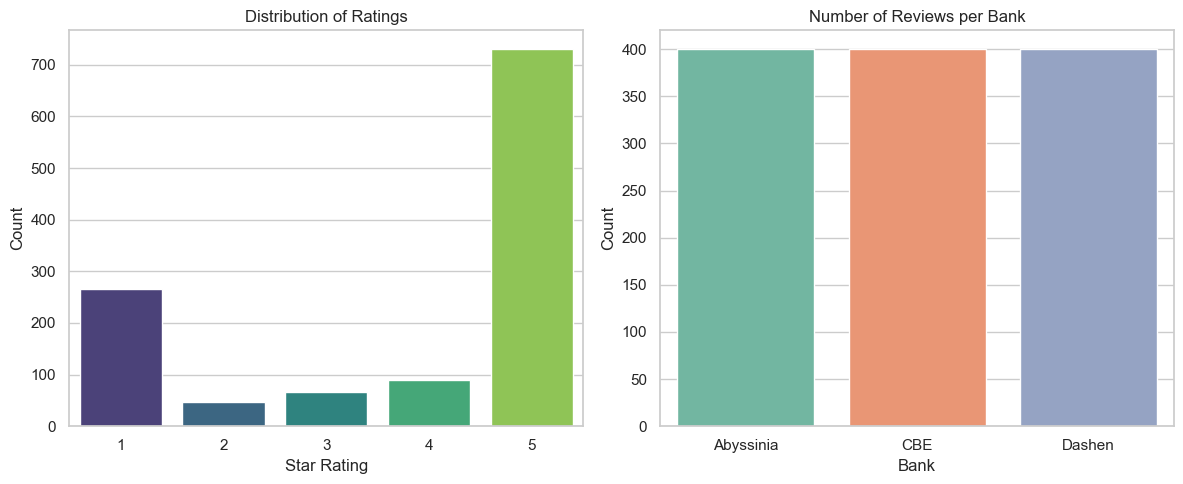

In [4]:
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

# 1. Ratings Distribution
plt.subplot(1, 2, 1)
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')

# 2. Reviews per Bank
plt.subplot(1, 2, 2)
sns.countplot(x='bank_code', data=df, palette='Set2')
plt.title('Number of Reviews per Bank')
plt.xlabel('Bank')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

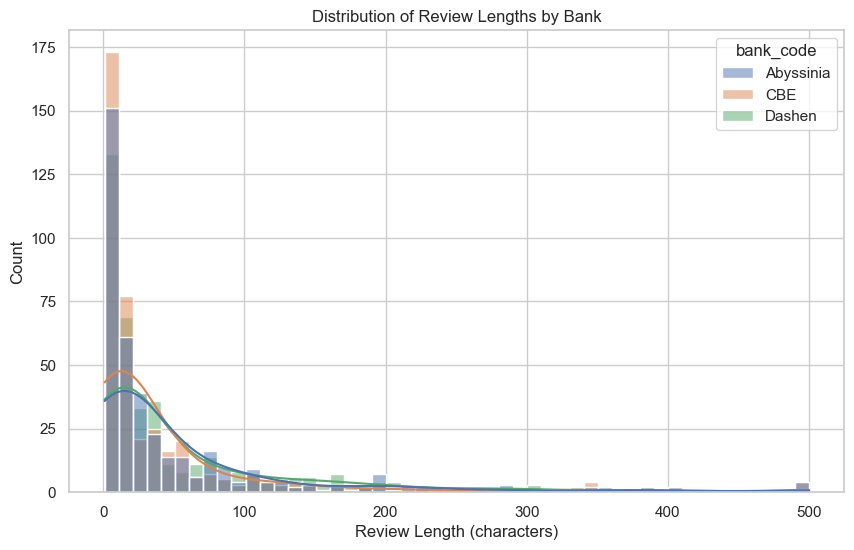

In [5]:
# 3. Review Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', bins=50, kde=True, hue='bank_code')
plt.title('Distribution of Review Lengths by Bank')
plt.xlabel('Review Length (characters)')
plt.ylabel('Count')
plt.show()